In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = cv2.face.LBPHFaceRecognizer_create()
#cv2.face.FisherFaceRecognizer_create()

In [ ]:
face_db = [
           "/content/1.jpg",
           "/content/5.jpg"
           
]

In [ ]:
detector = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")

In [ ]:
def detect_face(img_path):
  img = cv2.imread(img_path)
  detected_faces = detector.detectMultiScale(img, 1.3, 5)
  x, y, w, h = detected_faces[0]

  img = img[y:y+h, x:x+w]
  img = cv2.resize(img, (224, 224))

  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  return img

In [ ]:
faces = []; ids = []
index = 0
for img_path in face_db:
  #print(img_path)
  detected_face = detect_face(img_path)
  #plt.imshow(detected_face)
  #plt.show()
  faces.append(detected_face)
  ids.append(index)

  index = index + 1

In [ ]:
ids = np.array(ids)


In [ ]:
type(ids)

numpy.ndarray

In [ ]:
faces

[array([[ 61,  69,  66, ..., 107, 119, 137],
        [ 64,  70,  81, ..., 109, 128, 142],
        [ 75,  75,  68, ..., 116, 128, 142],
        ...,
        [ 78, 129, 142, ..., 193, 151, 117],
        [113, 149, 138, ..., 208, 160, 114],
        [130, 140, 138, ..., 174, 124, 124]], dtype=uint8),
 array([[ 10,   9,   7, ...,  36,  36,  36],
        [ 10,   9,   6, ...,  36,  36,  36],
        [ 11,   9,   5, ...,  36,  36,  36],
        ...,
        [113, 116, 120, ...,  82,  82,  82],
        [112, 115, 120, ...,  82,  82,  82],
        [112, 115, 120, ...,  82,  82,  82]], dtype=uint8)]

In [ ]:
model.train(faces, ids)

In [ ]:
model.save("my_model.yml")

In [ ]:
#model.read()

In [ ]:
histrograms = model.getHistograms()

In [ ]:
histrograms[0][0]

array([0.11248285, 0.00685871, 0.01508916, ..., 0.00548697, 0.00548697,
       0.10562414], dtype=float32)

In [ ]:
target_path = "/content/6.jpg"

In [ ]:
target = detect_face(target_path)

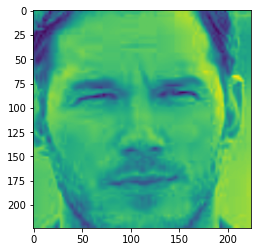

In [ ]:
plt.imshow(target)

In [ ]:
idx, confidence = model.predict(target)

In [ ]:
found_path = face_db[idx]

In [ ]:
found = detect_face(found_path)

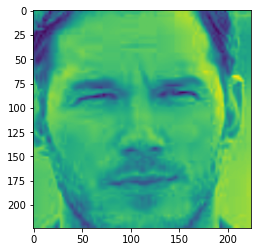

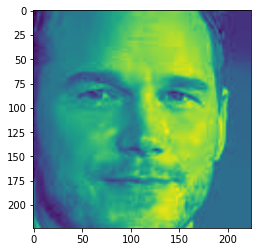

In [ ]:
plt.imshow(target)
plt.show()
plt.imshow(found)
plt.show()

In [ ]:
print("Confidence", confidence)

Confidence 70.43573592242137
